## Arm Reaching (RM Session 1)

In [1]:
import os
import numpy as np
import mne
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
# from google.colab import drive
# drive.mount('/content/drive')
from scipy.io import loadmat
from scipy.signal import butter, lfilter
warnings.filterwarnings('ignore')

### read paths of all .mat files in a list

In [2]:
folder_path=r'D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM'
folder_files=os.listdir(folder_path)
for i in folder_files:
    print(i)

EEG_session1_sub10_reaching_realMove.mat
EEG_session1_sub11_reaching_realMove.mat
EEG_session1_sub12_reaching_realMove.mat
EEG_session1_sub13_reaching_realMove.mat
EEG_session1_sub14_reaching_realMove.mat
EEG_session1_sub15_reaching_realMove.mat
EEG_session1_sub16_reaching_realMove.mat
EEG_session1_sub17_reaching_realMove.mat
EEG_session1_sub18_reaching_realMove.mat
EEG_session1_sub19_reaching_realMove.mat
EEG_session1_sub1_reaching_realMove.mat
EEG_session1_sub20_reaching_realMove.mat
EEG_session1_sub21_reaching_realMove.mat
EEG_session1_sub22_reaching_realMove.mat
EEG_session1_sub23_reaching_realMove.mat
EEG_session1_sub24_reaching_realMove.mat
EEG_session1_sub25_reaching_realMove.mat
EEG_session1_sub2_reaching_realMove.mat
EEG_session1_sub3_reaching_realMove.mat
EEG_session1_sub4_reaching_realMove.mat
EEG_session1_sub5_reaching_realMove.mat
EEG_session1_sub6_reaching_realMove.mat
EEG_session1_sub7_reaching_realMove.mat
EEG_session1_sub8_reaching_realMove.mat
EEG_session1_sub9_reachi

In [3]:
matfiles=[]
for i in folder_files:
    file=folder_path+'\\'+i
    matfiles.append(file) 
for i in matfiles:
    print(i)

D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub10_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub11_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub12_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub13_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub14_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub15_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub16_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub17_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub18_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-rea

### explore all keys for a file

In [4]:
temp = loadmat(matfiles[0])
temp.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'mnt', 'nfo', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'ch17', 'ch18', 'ch19', 'ch20', 'ch21', 'ch22', 'ch23', 'ch24', 'ch25', 'ch26', 'ch27', 'ch28', 'ch29', 'ch30', 'ch31', 'ch32', 'ch33', 'ch34', 'ch35', 'ch36', 'ch37', 'ch38', 'ch39', 'ch40', 'ch41', 'ch42', 'ch43', 'ch44', 'ch45', 'ch46', 'ch47', 'ch48', 'ch49', 'ch50', 'ch51', 'ch52', 'ch53', 'ch54', 'ch55', 'ch56', 'ch57', 'ch58', 'ch59', 'ch60', 'dat'])

In [5]:
col=1
for i in temp['nfo'][0][0][0][0]:
    print('ch'+str(col),' : ',i[0],end = '\n')
    col+=1

ch1  :  Fp1
ch2  :  AF7
ch3  :  AF3
ch4  :  AFz
ch5  :  F7
ch6  :  F5
ch7  :  F3
ch8  :  F1
ch9  :  Fz
ch10  :  FT7
ch11  :  FC5
ch12  :  FC3
ch13  :  FC1
ch14  :  T7
ch15  :  C5
ch16  :  C3
ch17  :  C1
ch18  :  Cz
ch19  :  TP7
ch20  :  CP5
ch21  :  CP3
ch22  :  CP1
ch23  :  CPz
ch24  :  P7
ch25  :  P5
ch26  :  P3
ch27  :  P1
ch28  :  Pz
ch29  :  PO7
ch30  :  PO3
ch31  :  POz
ch32  :  Fp2
ch33  :  AF4
ch34  :  AF8
ch35  :  F2
ch36  :  F4
ch37  :  F6
ch38  :  F8
ch39  :  FC2
ch40  :  FC4
ch41  :  FC6
ch42  :  FT8
ch43  :  C2
ch44  :  C4
ch45  :  C6
ch46  :  T8
ch47  :  CP2
ch48  :  CP4
ch49  :  CP6
ch50  :  TP8
ch51  :  P2
ch52  :  P4
ch53  :  P6
ch54  :  P8
ch55  :  PO4
ch56  :  PO8
ch57  :  O1
ch58  :  Oz
ch59  :  O2
ch60  :  Iz


### to_data_frame() :
- prepare a file in data frame
- map the labels correctly for their trials
- drop unnecessary channels
- take selected count of trials

In [6]:
def to_data_frame(matfile,selected_channels,number_of_trials):

    #load the mat file
    data = loadmat(matfile)

    #new data frame to extract the target data
    df=pd.DataFrame()

    #the scientific name for the selected electrodes
    selected_electrodes=[]
    for i in selected_channels:
        selected_electrodes.append('ch'+str(i)+'_'+data['nfo'][0][0][0][0][i-1][0])

    #select target channels in the data frame   
    index=0
    for i in selected_electrodes:
        added_channel = pd.DataFrame(data['ch'+str(selected_channels[index])],columns =[i])
        df = pd.concat([df,added_channel],axis=1)
        index+=1

    #add labels col & initialize withe none
    labels = np.empty(data['nfo'][0][0][2][0][0])  # data['nfo'][0][0][2][0][0] --> return number of frames (rows)
    labels.fill(np.nan) 
    trials =np.empty(data['nfo'][0][0][2][0][0])
    trials.fill(np.nan)

    #dictionary for mapping triger events to numbers from 0 to 6 in the same order 
    label_decode ={11:0 , 21:1 , 31:2 , 41:3 , 51:4 , 61:5 , 8:6}

    #labels extraction
    start_point_info = data['mrk'][0][0][5][0][0][0][0][0] 
    end_point_info = data['mrk'][0][0][5][0][0][0][0][1]
    trigger_marking_time = data['mrk'][0][0][0][0]
    trigger_number = data['mrk'][0][0][1][0]
    last_trial ={0:0 , 1:0 , 2:0 , 3:0 , 4:0 , 5:0 , 6:0}

    
    for i in range (0,data['nfo'][0][0][8][0][0]): # data['nfo'][0][0][8][0][0] --> 600 (300 trial + 300 rest period)

        start,end=0,0
        label=label_decode[trigger_number[i]]

        # if last_trial[label]==number_of_trials:
        #     continue

        if i==0:
            start=start_point_info
            end=trigger_marking_time[i]
        elif i==599:
            start=trigger_marking_time[i]
            end=end_point_info
        else:
            start=trigger_marking_time[i-1]
            end=trigger_marking_time[i]
        
        last_trial[label]+=1
        
        for j in range (start,end):
            labels[j]=label
            trials[j]=last_trial[label]  

       
    df=df.assign(Label=labels)
    df=df.assign(Trial=trials)

    #drop rest of rows which didn't assigned to label
    df.dropna(how='any',inplace=True)
     
    return df
    

In [7]:
glob_test=pd.DataFrame()
glob_train=pd.DataFrame()
selected_channels=[2,3,4,6,7,8,9,11,12,13,14,15,16,17,18]
labels_codes ={0:'Forward' , 1:'Backward' , 2:'Left' , 3:'Right' , 4:'Up' , 5:'Down' , 6:'Rest'}
number_of_trials=50  #selected number of trials for each class

In [8]:
df=to_data_frame(matfiles[0],selected_channels,number_of_trials)

In [9]:
df

ch2_AF7  ch3_AF3  ch4_AFz  ch6_F5  ch7_F3  ch8_F1  ch9_Fz  ch11_FC5  \
41843       -782     5340      574    5550    5013     763    7570      4127   
41844       -784     5326      568    5520    4992     750    7536      4129   
41845       -787     5311      563    5489    4972     738    7504      4130   
41846       -791     5298      557    5457    4952     728    7472      4132   
41847       -795     5282      552    5422    4927     717    7443      4131   
...          ...      ...      ...     ...     ...     ...     ...       ...   
8641802    -1558     6267      407    4688    4038    6066    6556        98   
8641803    -1577     6261      407    4664    4027    6049    6555        95   
8641804    -1595     6252      408    4645    4016    6038    6557        96   
8641805    -1615     6243      407    4622    4002    6020    6554        97   
8641806    -1633     6235      407    4603    3988    6001    6554       100   

         ch12_FC3  ch13_FC1  ch14_T7  ch15_C5  ch16_C3  ch17_C1  ch18_Cz  \
41843        6039      1578     2577     3586     9330     1366    13510   
41844        6025      1565     2583     3583     9338     1361    13506   
41845        6014      1552     2591     3581     9348     1359    13510   
41846        5991      1531     2597     3574     9355     1354    13512   
41847        5971      1512     2602     3566     9357     1345    13512   
...           ...       ...      ...      ...      ...      ...      ...   
8641802      9735      2873     1280     4256     9818    -3934     8131   
8641803      9748      2865     1273     4247     9802    -3967     8108   
8641804      9766      2865     1269     4241     9794    -4003     8087   
8641805      9779      2861     1263     4231     9782    -4053     8057   
8641806      9797      2859     1256     4225     9770    -4097     8026   

         Label  Trial  
41843      2.0    1.0  
41844      2.0    1.0  
41845      2.0    1.0  
41846      2.0    1.0  
41847      2.0    1.0  
...        ...    ...  
8641802    6.0  300.0  
8641803    6.0  300.0  
8641804    6.0  300.0  
8641805    6.0  300.0  
8641806    6.0  300.0  

[8589926 rows x 17 columns]

In [10]:
df['Label'].value_counts()

6.0    3006773
5.0    1187028
1.0     879266
2.0     879244
0.0     879237
3.0     879211
4.0     879167
Name: Label, dtype: int64

### normalize the data between 0 and 1

In [11]:
features=df.columns[0:15]
features

Index(['ch2_AF7', 'ch3_AF3', 'ch4_AFz', 'ch6_F5', 'ch7_F3', 'ch8_F1', 'ch9_Fz',
       'ch11_FC5', 'ch12_FC3', 'ch13_FC1', 'ch14_T7', 'ch15_C5', 'ch16_C3',
       'ch17_C1', 'ch18_Cz'],
      dtype='object')

Text(0.5, 1.0, 'data before normalization')

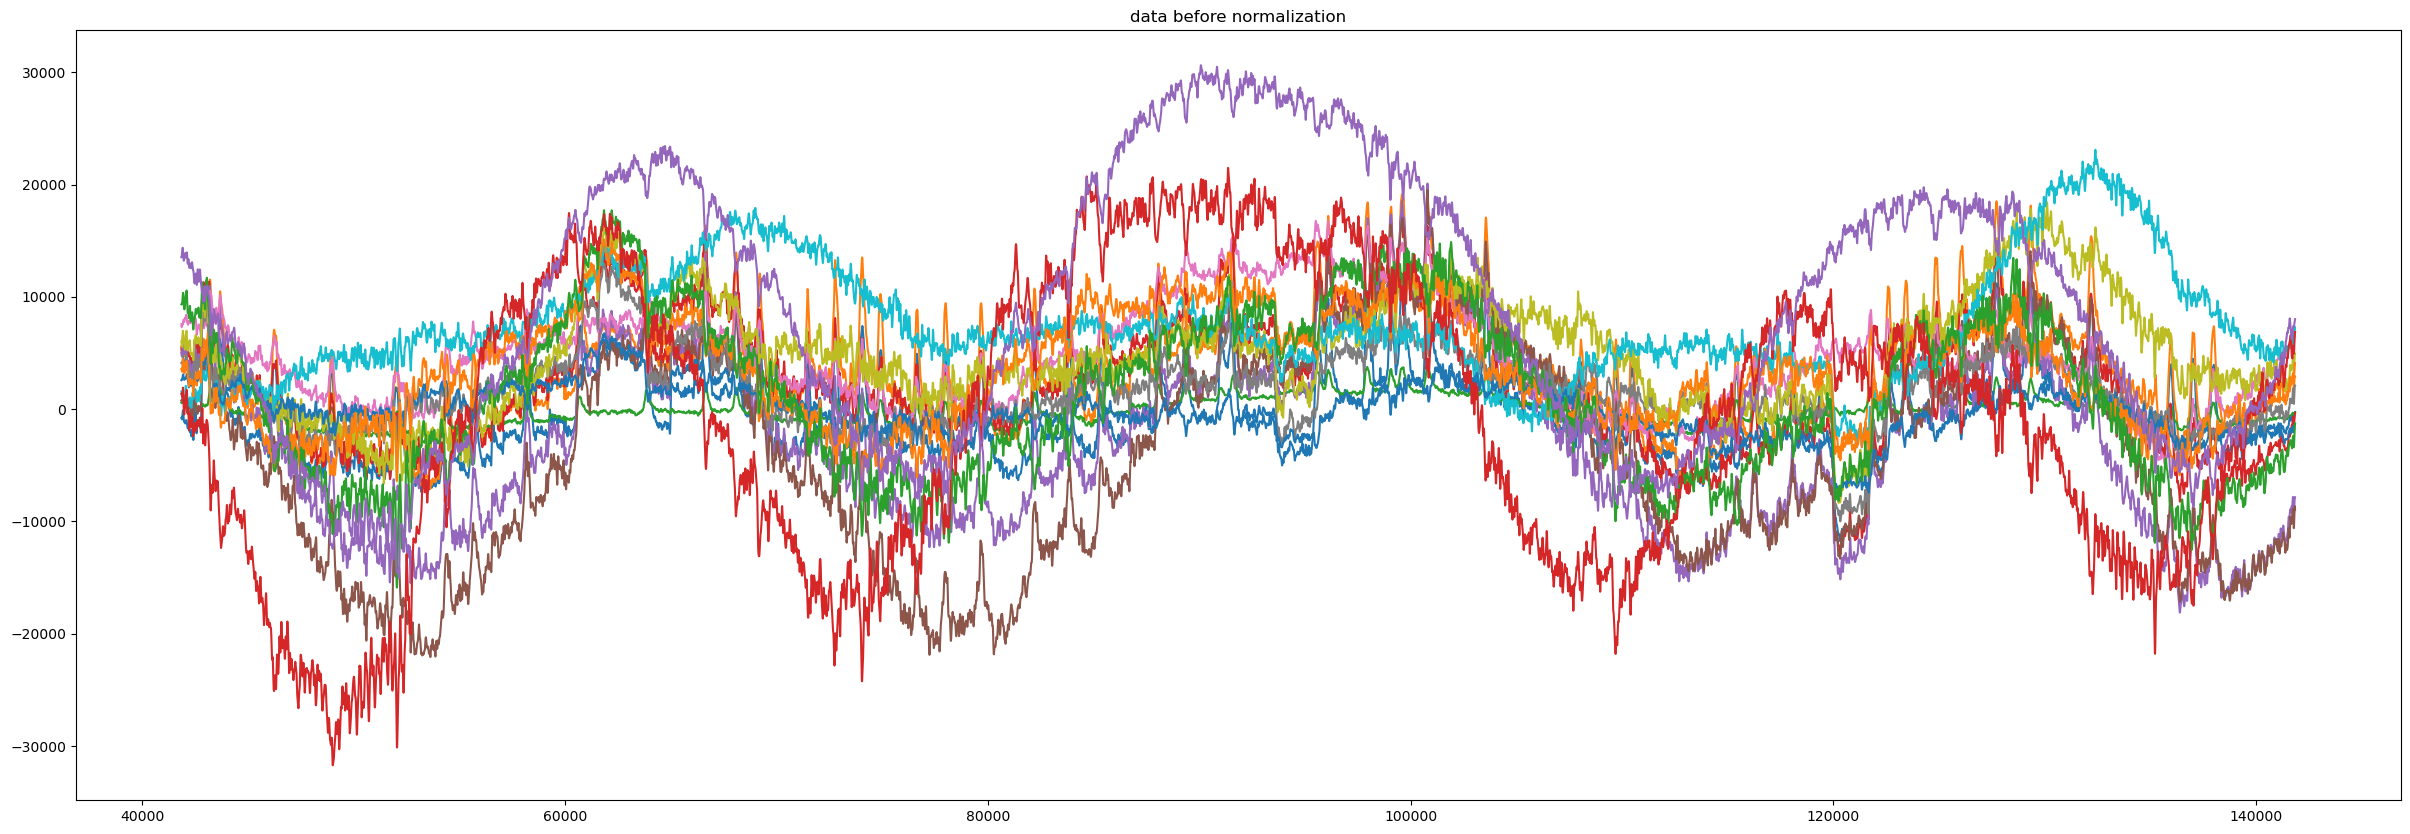

In [12]:
plt.plot(df.iloc[:100000,0:15])
plt.gcf().set_size_inches(30, 10)
plt.title("data before normalization")

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
df[features] = scaler.fit_transform(df[features])

In [14]:
df

ch2_AF7   ch3_AF3   ch4_AFz    ch6_F5    ch7_F3    ch8_F1    ch9_Fz  \
41843    0.354728  0.383552  0.412597  0.506026  0.559380  0.511777  0.481895   
41844    0.354689  0.383237  0.412076  0.505481  0.559023  0.511558  0.481196   
41845    0.354631  0.382900  0.411642  0.504919  0.558683  0.511355  0.480538   
41846    0.354555  0.382608  0.411122  0.504338  0.558343  0.511186  0.479880   
41847    0.354478  0.382248  0.410688  0.503702  0.557918  0.511001  0.479284   
...           ...       ...       ...       ...       ...       ...       ...   
8641802  0.339802  0.404387  0.398109  0.490381  0.542798  0.601252  0.461045   
8641803  0.339437  0.404252  0.398109  0.489945  0.542611  0.600965  0.461024   
8641804  0.339091  0.404050  0.398196  0.489600  0.542424  0.600780  0.461066   
8641805  0.338706  0.403848  0.398109  0.489183  0.542186  0.600476  0.461004   
8641806  0.338360  0.403668  0.398109  0.488838  0.541948  0.600155  0.461004   

         ch11_FC5  ch12_FC3  ch13_FC1   ch14_T7   ch15_C5   ch16_C3   ch17_C1  \
41843    0.655730  0.536862  0.366451  0.515098  0.654915  0.715291  0.518146   
41844    0.655766  0.536619  0.366187  0.515194  0.654861  0.715427  0.518069   
41845    0.655783  0.536429  0.365923  0.515323  0.654825  0.715596  0.518038   
41846    0.655819  0.536030  0.365496  0.515419  0.654698  0.715715  0.517962   
41847    0.655801  0.535683  0.365110  0.515500  0.654554  0.715749  0.517823   
...           ...       ...       ...       ...       ...       ...       ...   
8641802  0.584121  0.600915  0.392756  0.494266  0.666985  0.723582  0.436816   
8641803  0.584068  0.601140  0.392594  0.494154  0.666823  0.723311  0.436310   
8641804  0.584086  0.601452  0.392594  0.494089  0.666715  0.723175  0.435757   
8641805  0.584104  0.601678  0.392513  0.493993  0.666535  0.722971  0.434990   
8641806  0.584157  0.601990  0.392472  0.493881  0.666426  0.722767  0.434315   

          ch18_Cz  Label  Trial  
41843    0.597134    2.0    1.0  
41844    0.597050    2.0    1.0  
41845    0.597134    2.0    1.0  
41846    0.597176    2.0    1.0  
41847    0.597176    2.0    1.0  
...           ...    ...    ...  
8641802  0.484603    6.0  300.0  
8641803  0.484121    6.0  300.0  
8641804  0.483682    6.0  300.0  
8641805  0.483054    6.0  300.0  
8641806  0.482406    6.0  300.0  

[8589926 rows x 17 columns]

Text(0.5, 1.0, 'data after normalization')

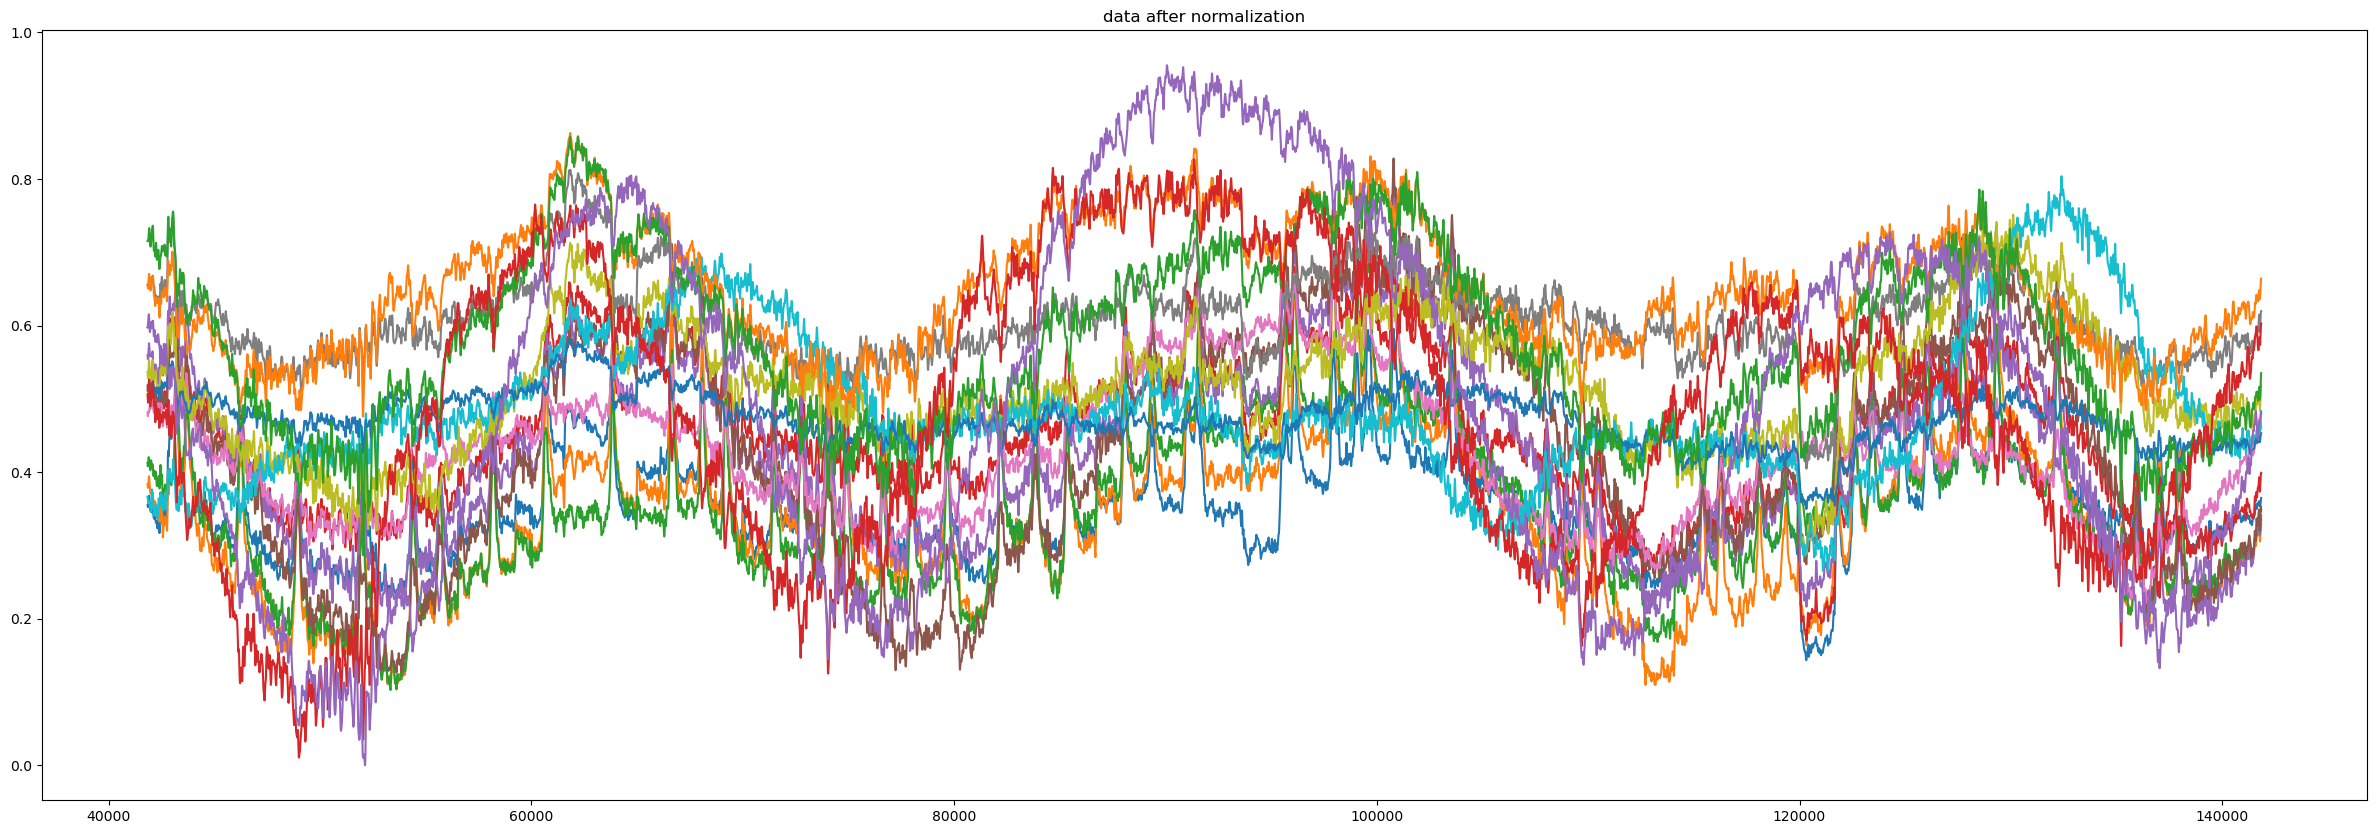

In [15]:
plt.plot(df.iloc[:100000,0:15])
plt.gcf().set_size_inches(30, 10)
plt.title("data after normalization")

### apply bandpass filter 

In [16]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

Text(0.5, 1.0, 'data before filter')

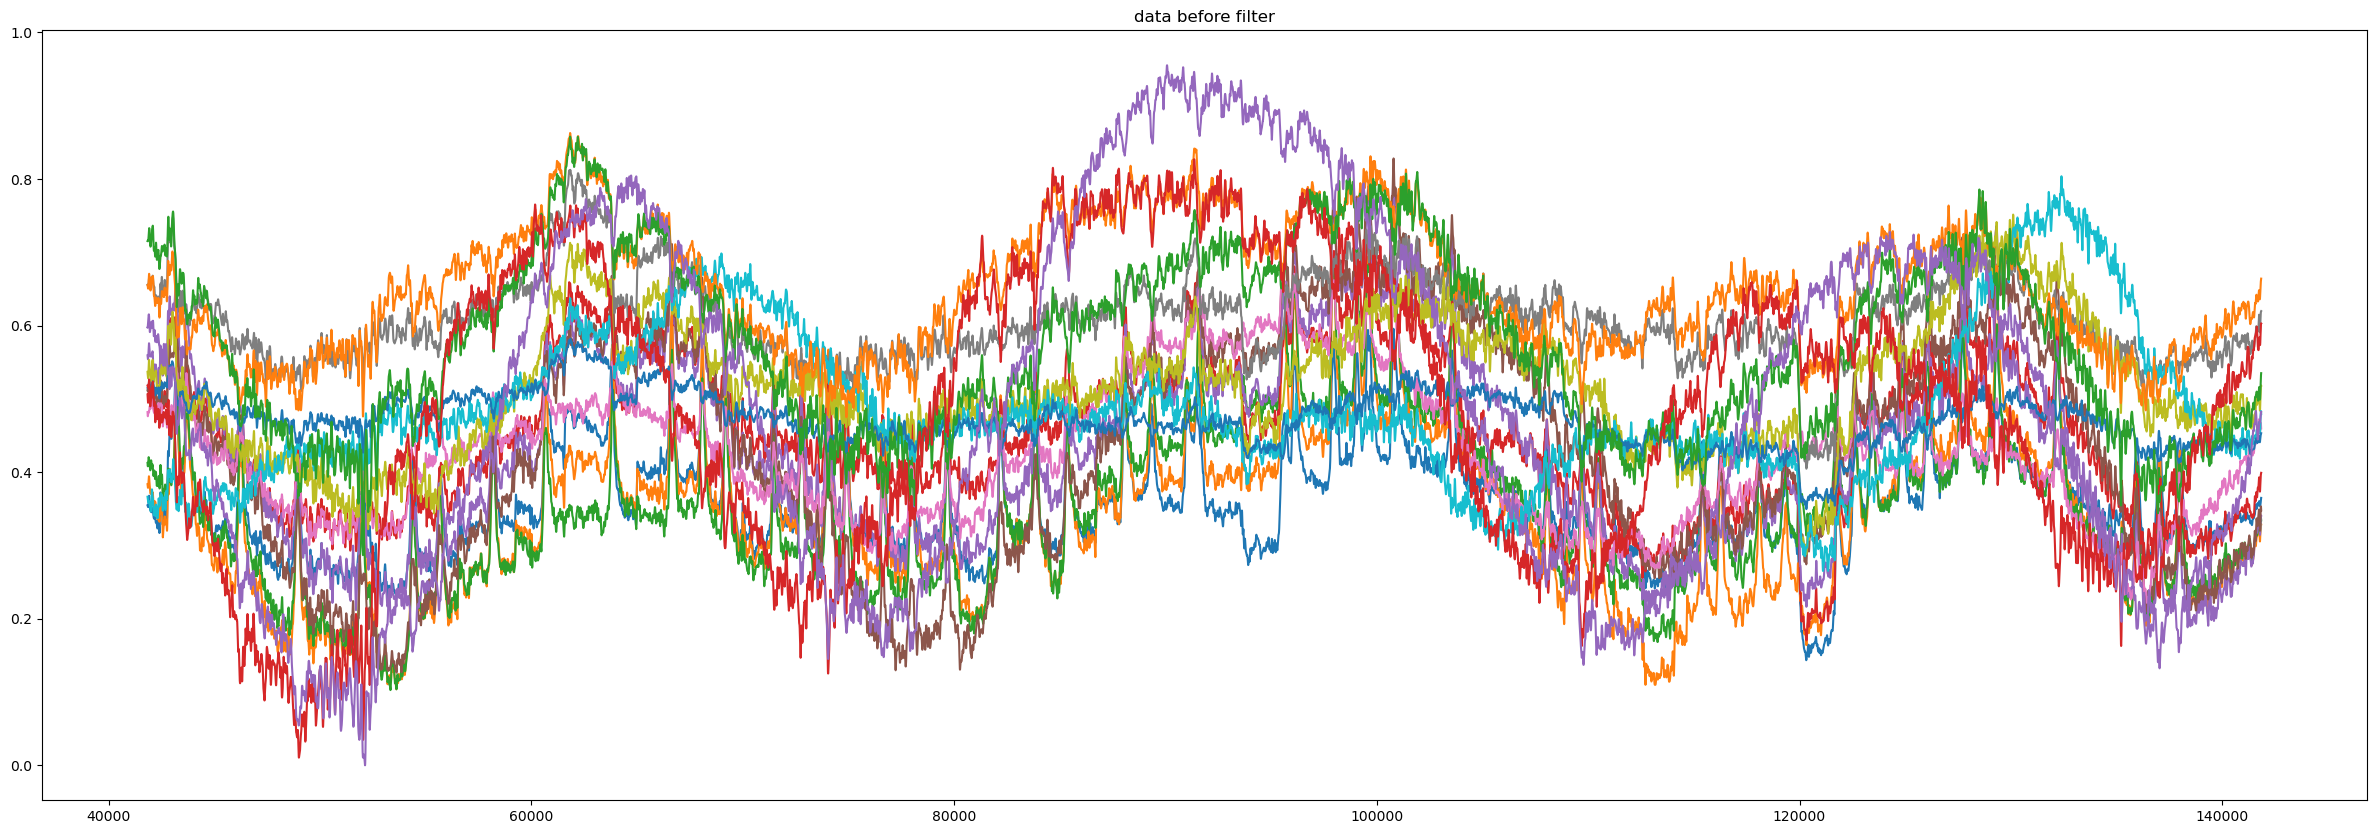

In [17]:
plt.plot(df.iloc[:100000,0:15])
plt.gcf().set_size_inches(30, 10)
plt.title("data before filter")

In [18]:
df.iloc[:,0:15] = butter_bandpass_filter(df.iloc[:,0:15].to_numpy() ,8,30,2500) # keep only alpha & beta brain waves

Text(0.5, 1.0, 'data after filter')

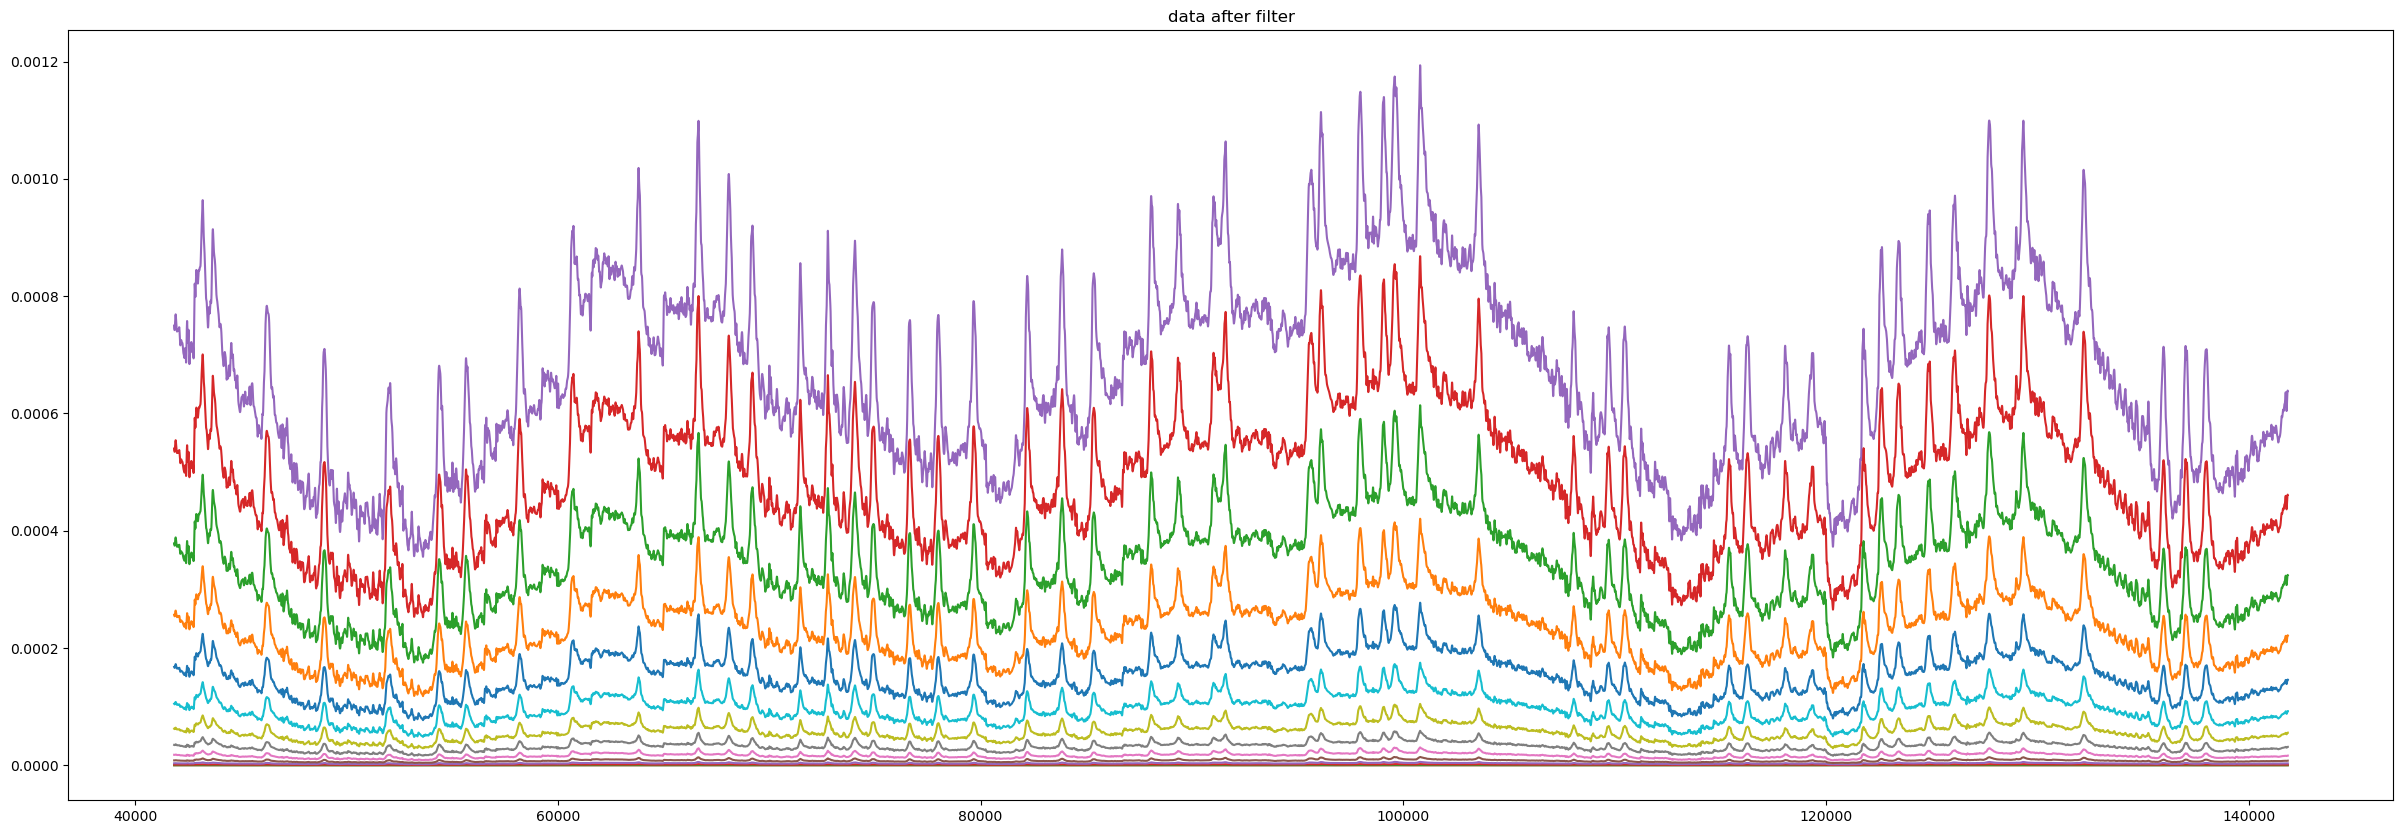

In [19]:
plt.plot(df.iloc[:100000,0:15])
plt.gcf().set_size_inches(30, 10)
plt.title("data after filter")

Text(0.5, 1.0, 'Rest')

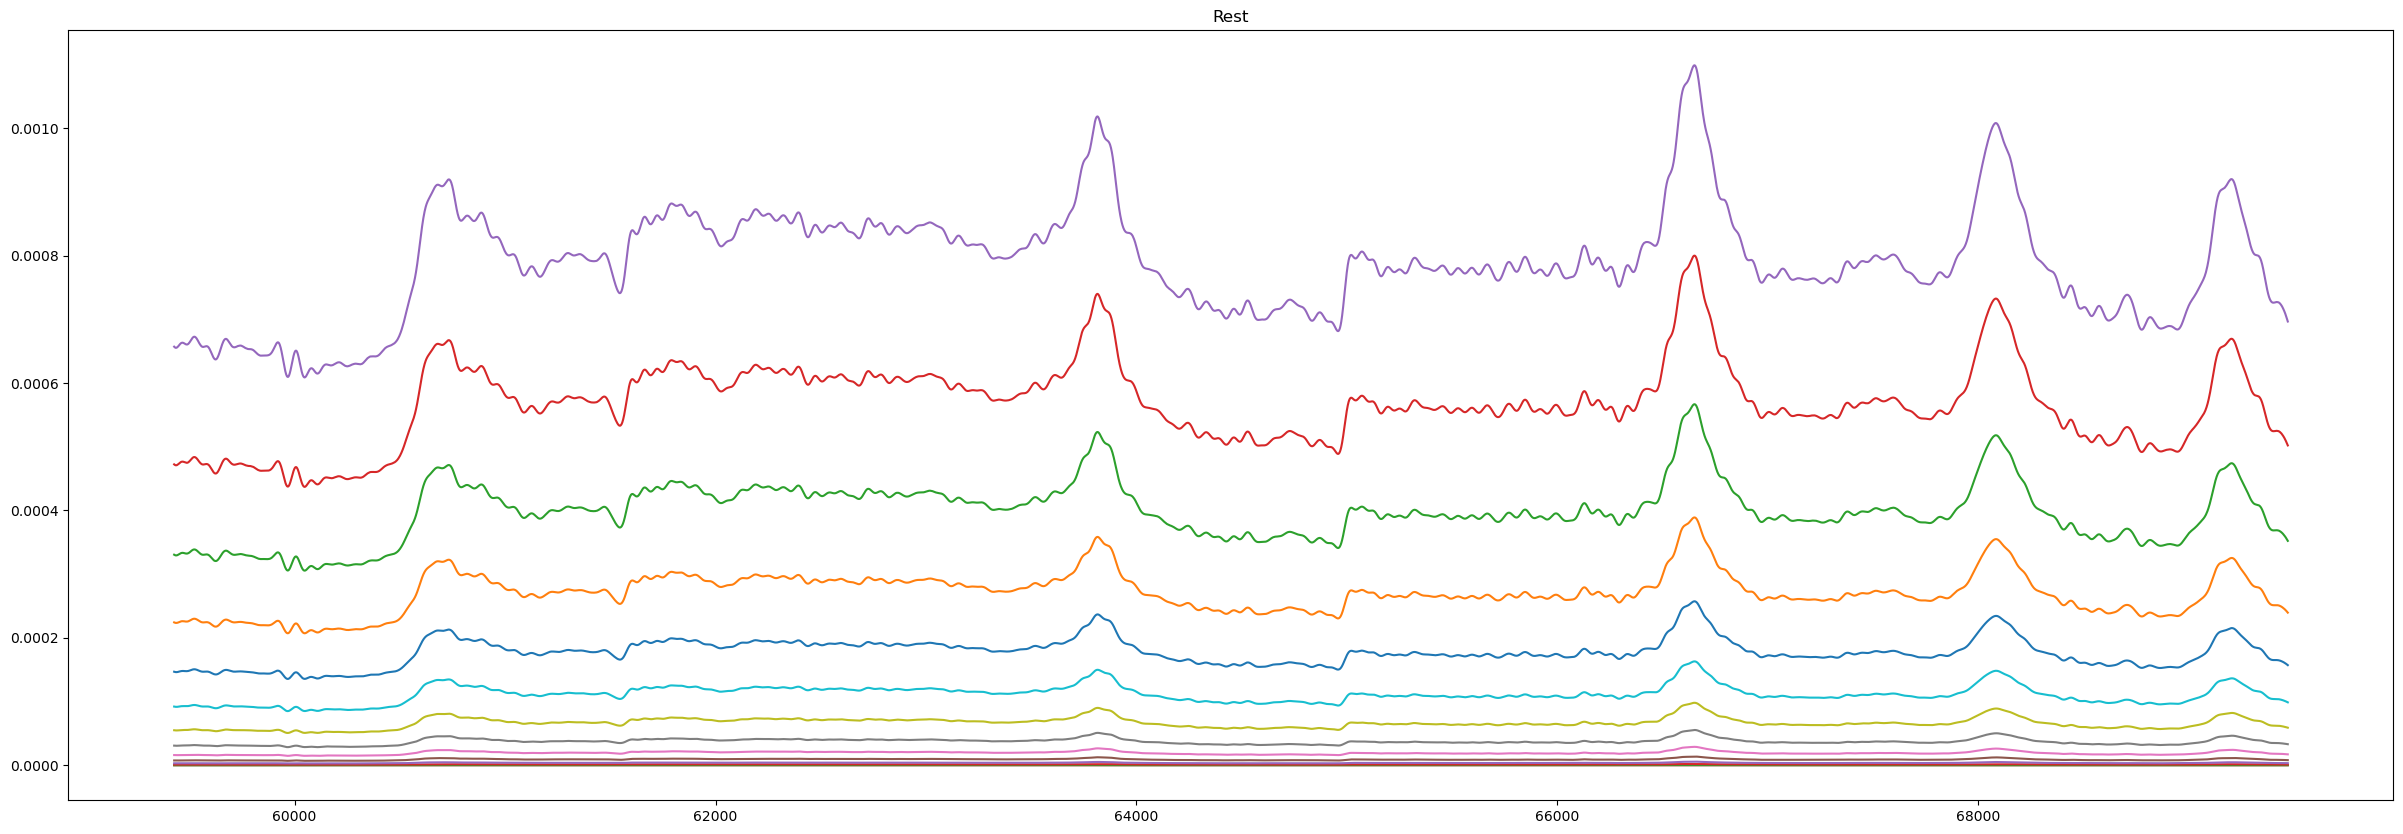

In [20]:
plt.plot(df.loc[ (df['Label']==6) & (df['Trial']==1)].iloc[:,:15])
plt.gcf().set_size_inches(30, 10)
plt.title("Rest")

Text(0.5, 1.0, 'Forward')

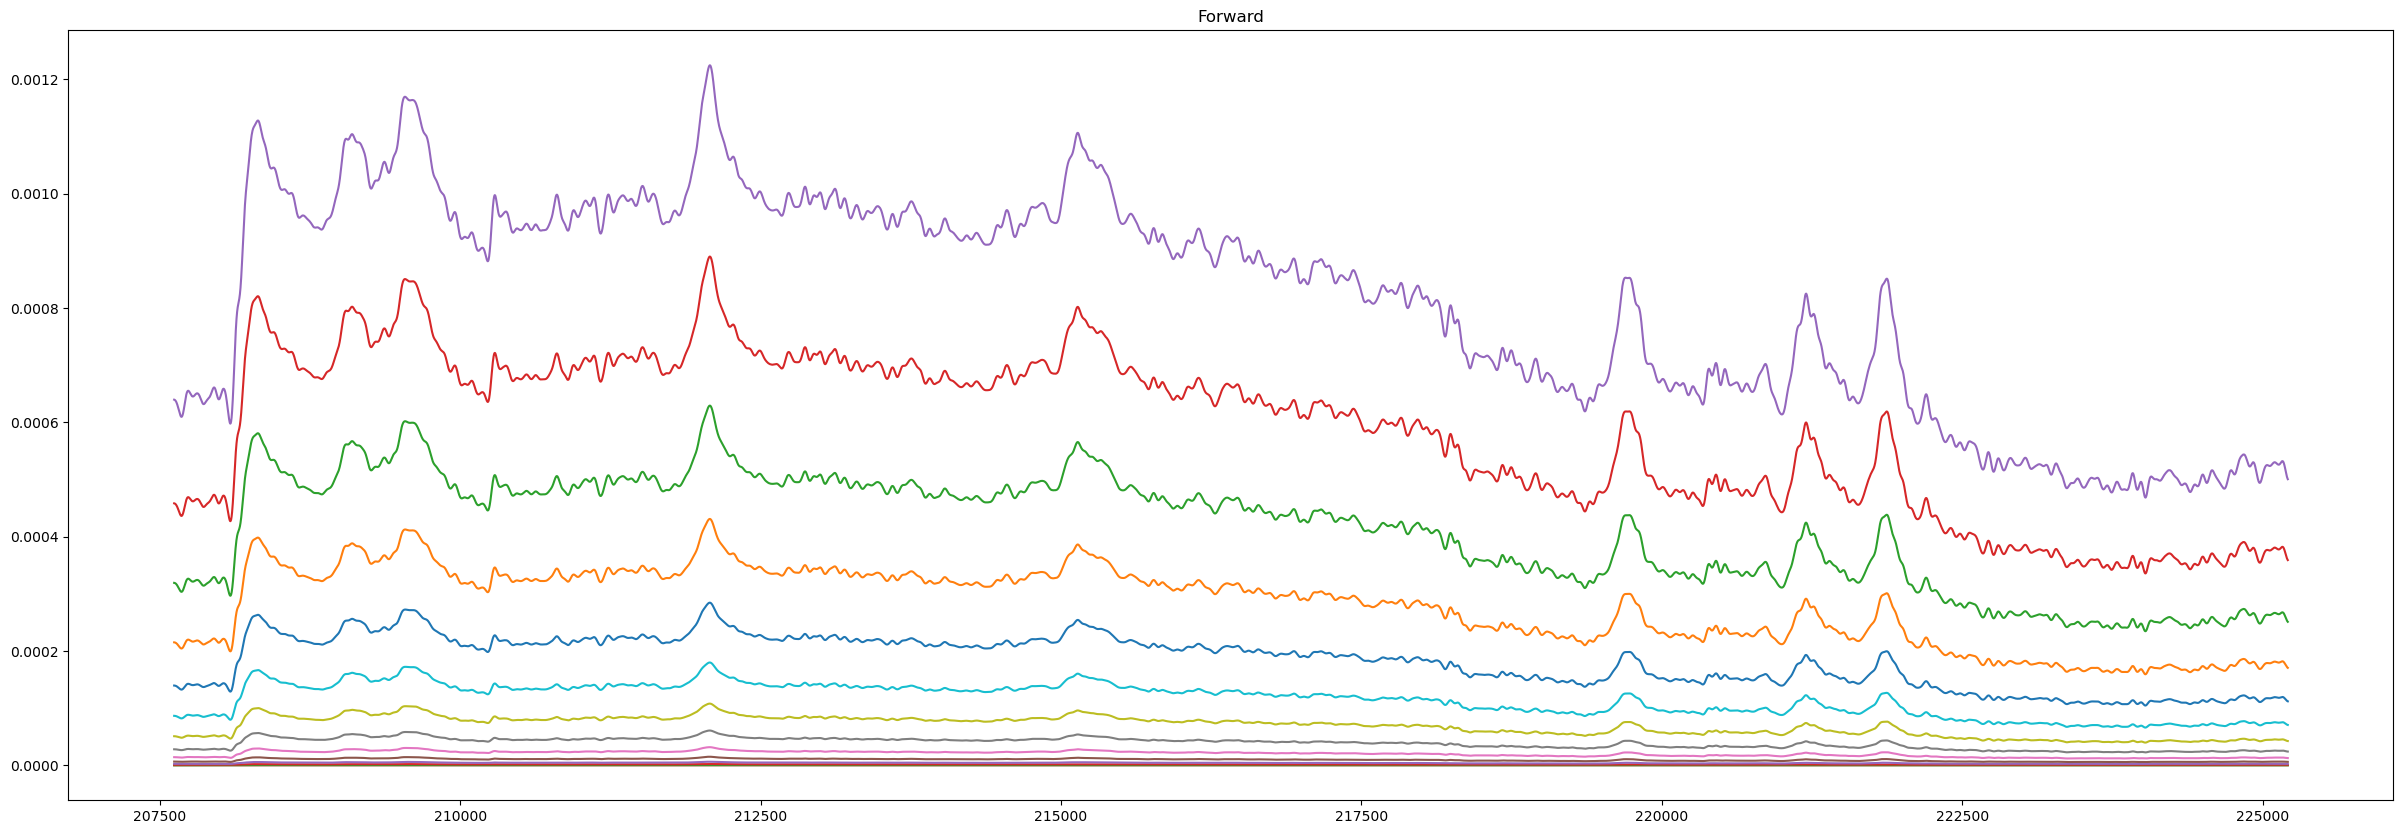

In [21]:
plt.plot(df.loc[ (df['Label']==0) & (df['Trial']==1)].iloc[:,:15])
plt.gcf().set_size_inches(30, 10)
plt.title("Forward")

Text(0.5, 1.0, 'Backward')

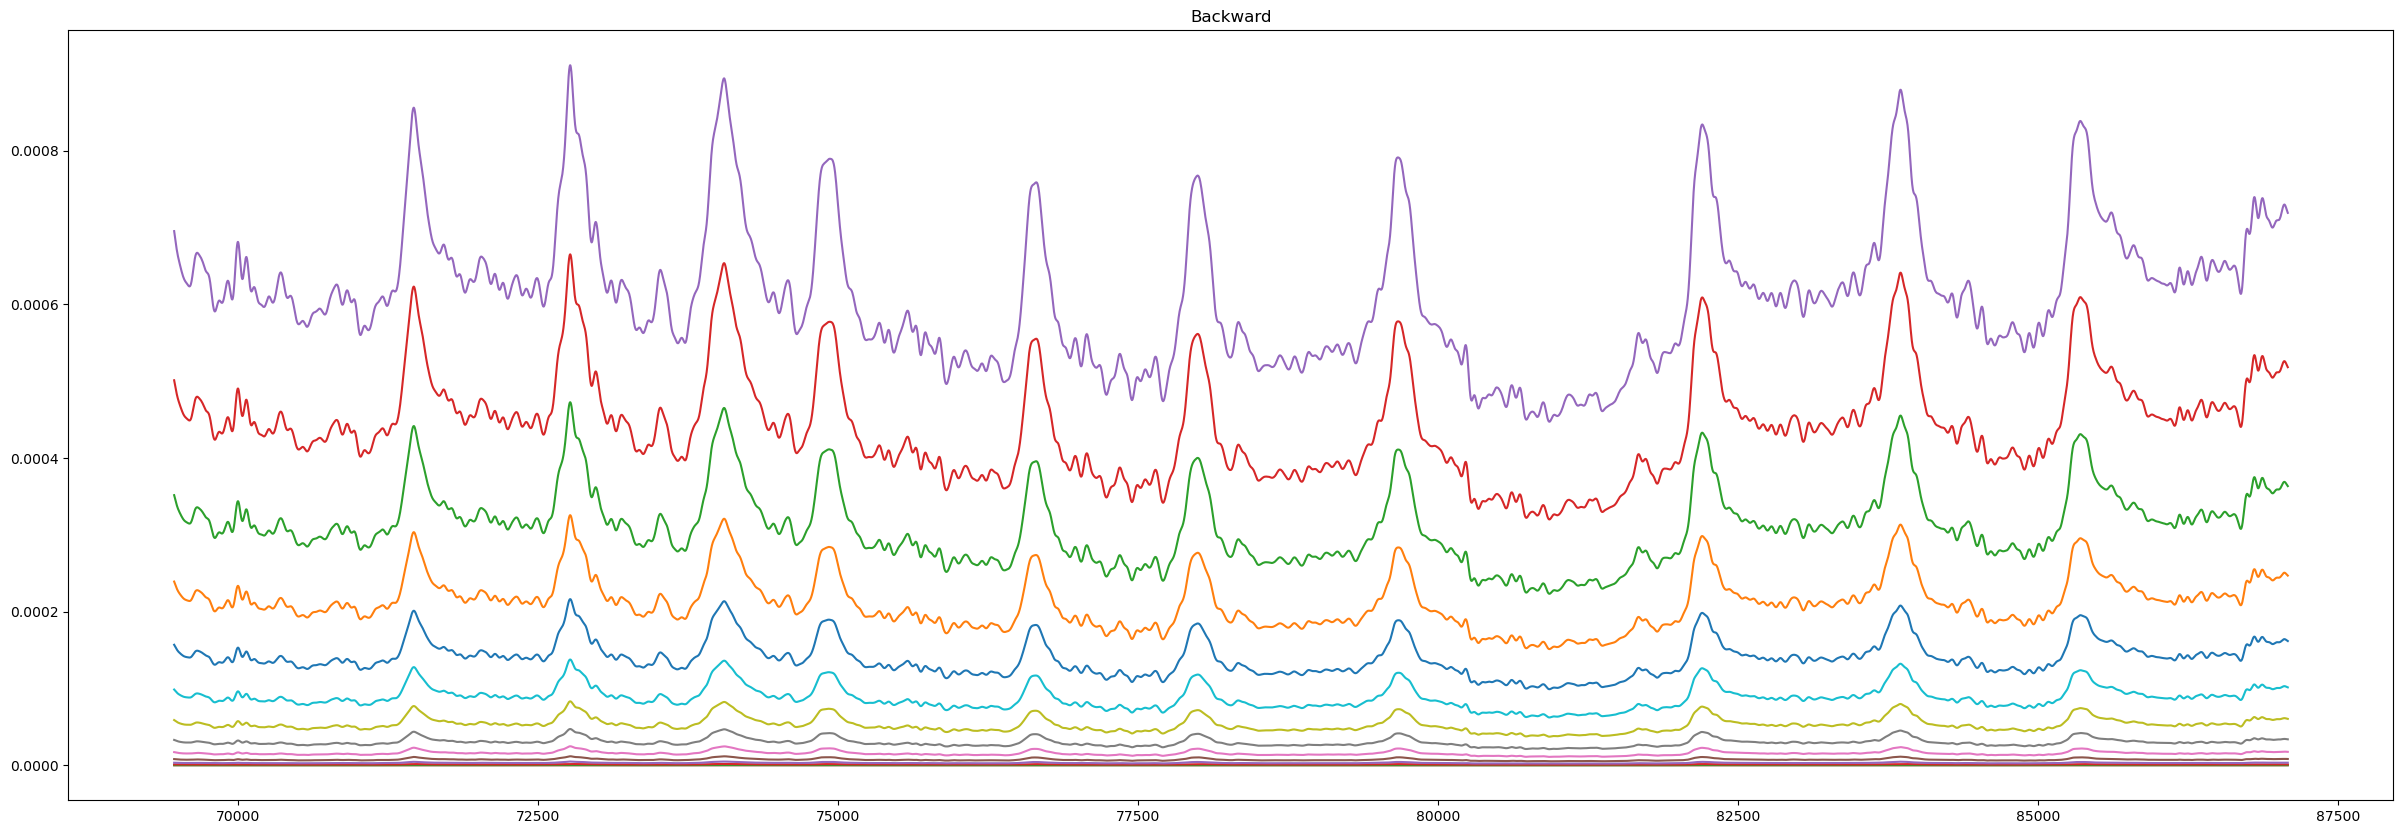

In [22]:
plt.plot(df.loc[ (df['Label']==1) & (df['Trial']==1)].iloc[:,:15])
plt.gcf().set_size_inches(30, 10)
plt.title("Backward")

Text(0.5, 1.0, 'Left')

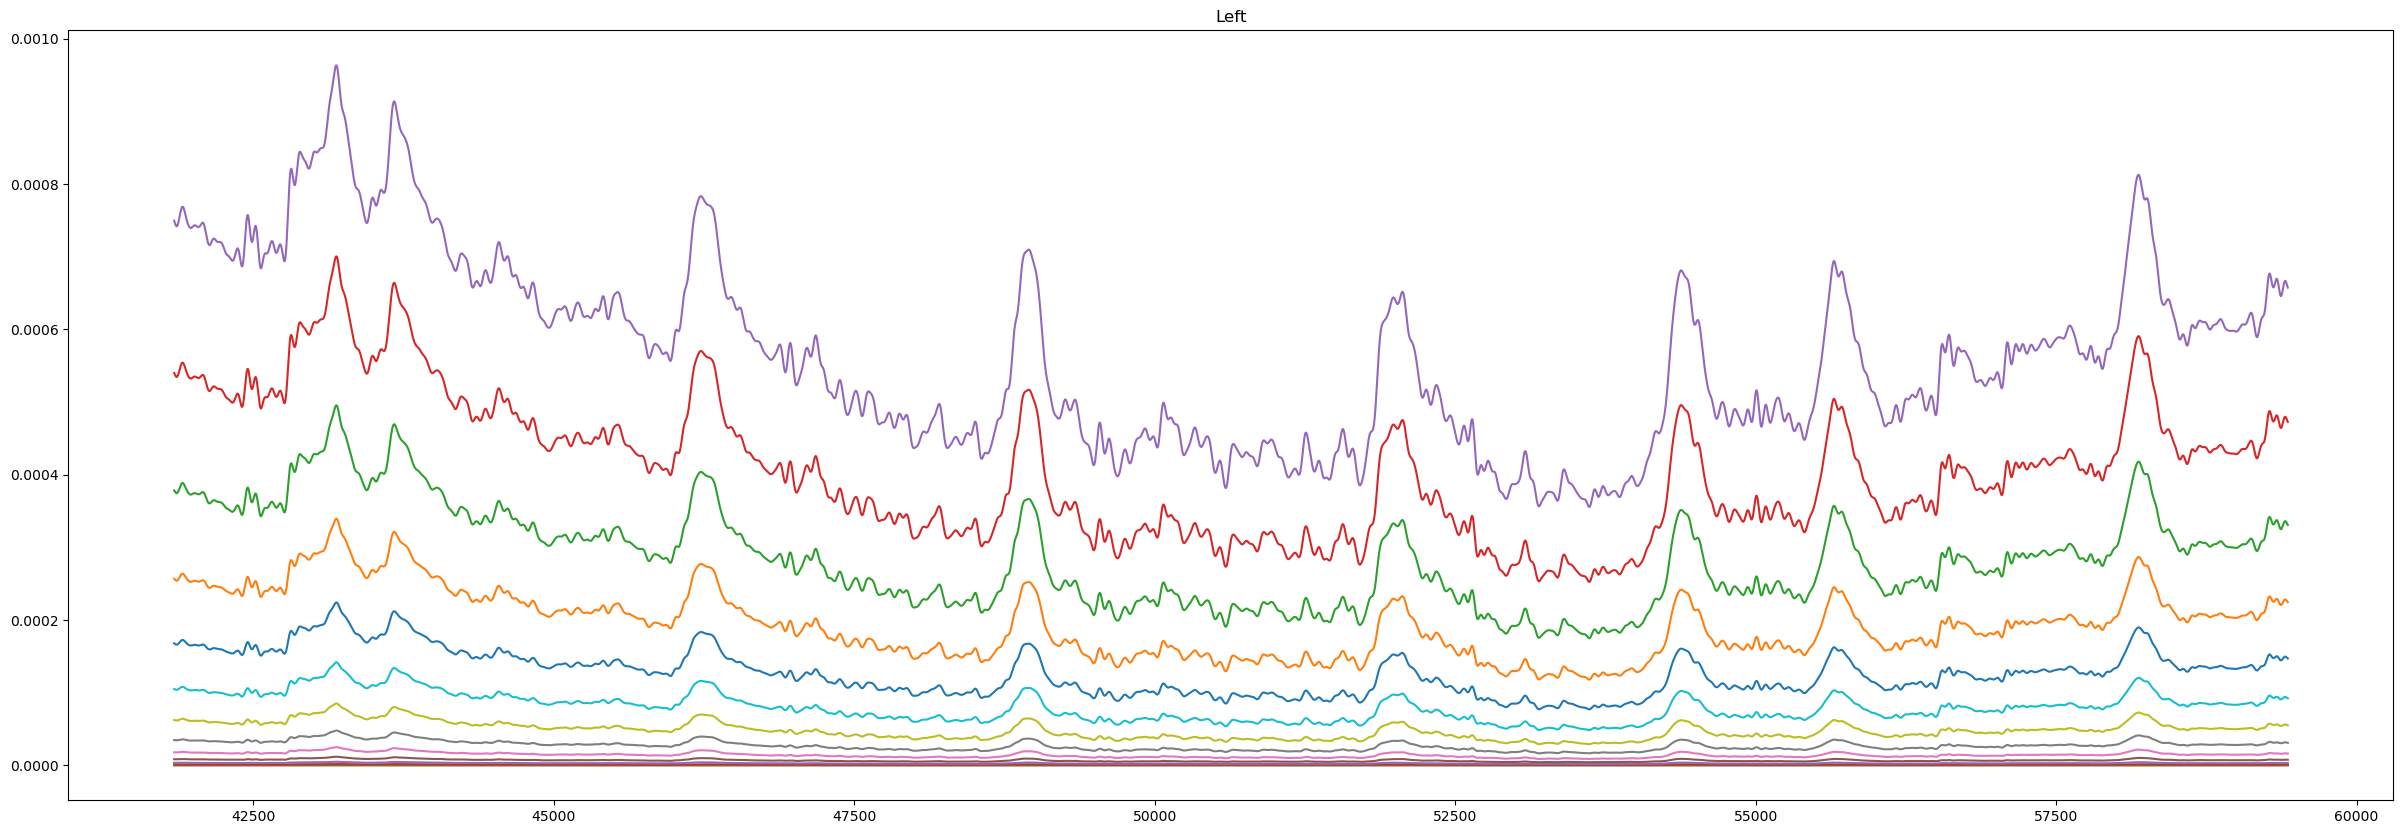

In [23]:
plt.plot(df.loc[ (df['Label']==2) & (df['Trial']==1)].iloc[:,:15])
plt.gcf().set_size_inches(30, 10)
plt.title("Left")

Text(0.5, 1.0, 'Right')

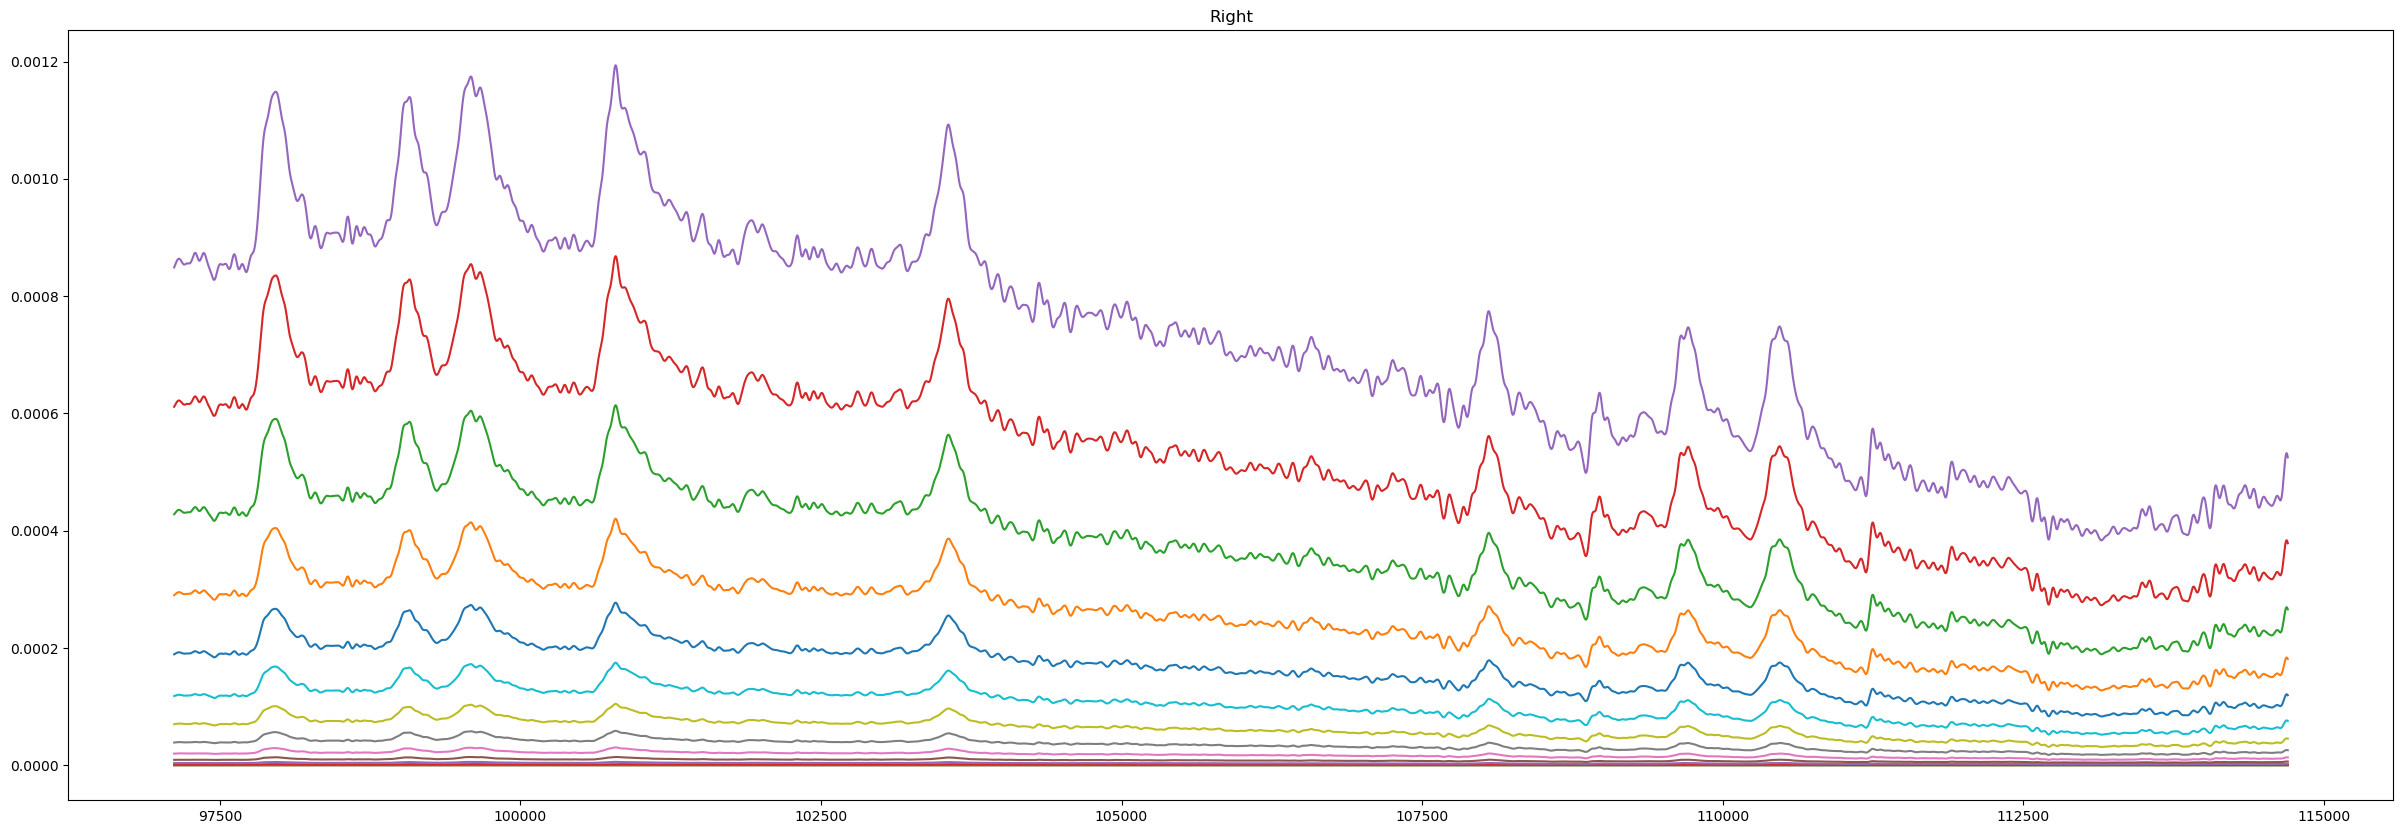

In [24]:
plt.plot(df.loc[ (df['Label']==3) & (df['Trial']==1)].iloc[:,:15])
plt.gcf().set_size_inches(30, 10)
plt.title("Right")

Text(0.5, 1.0, 'Up')

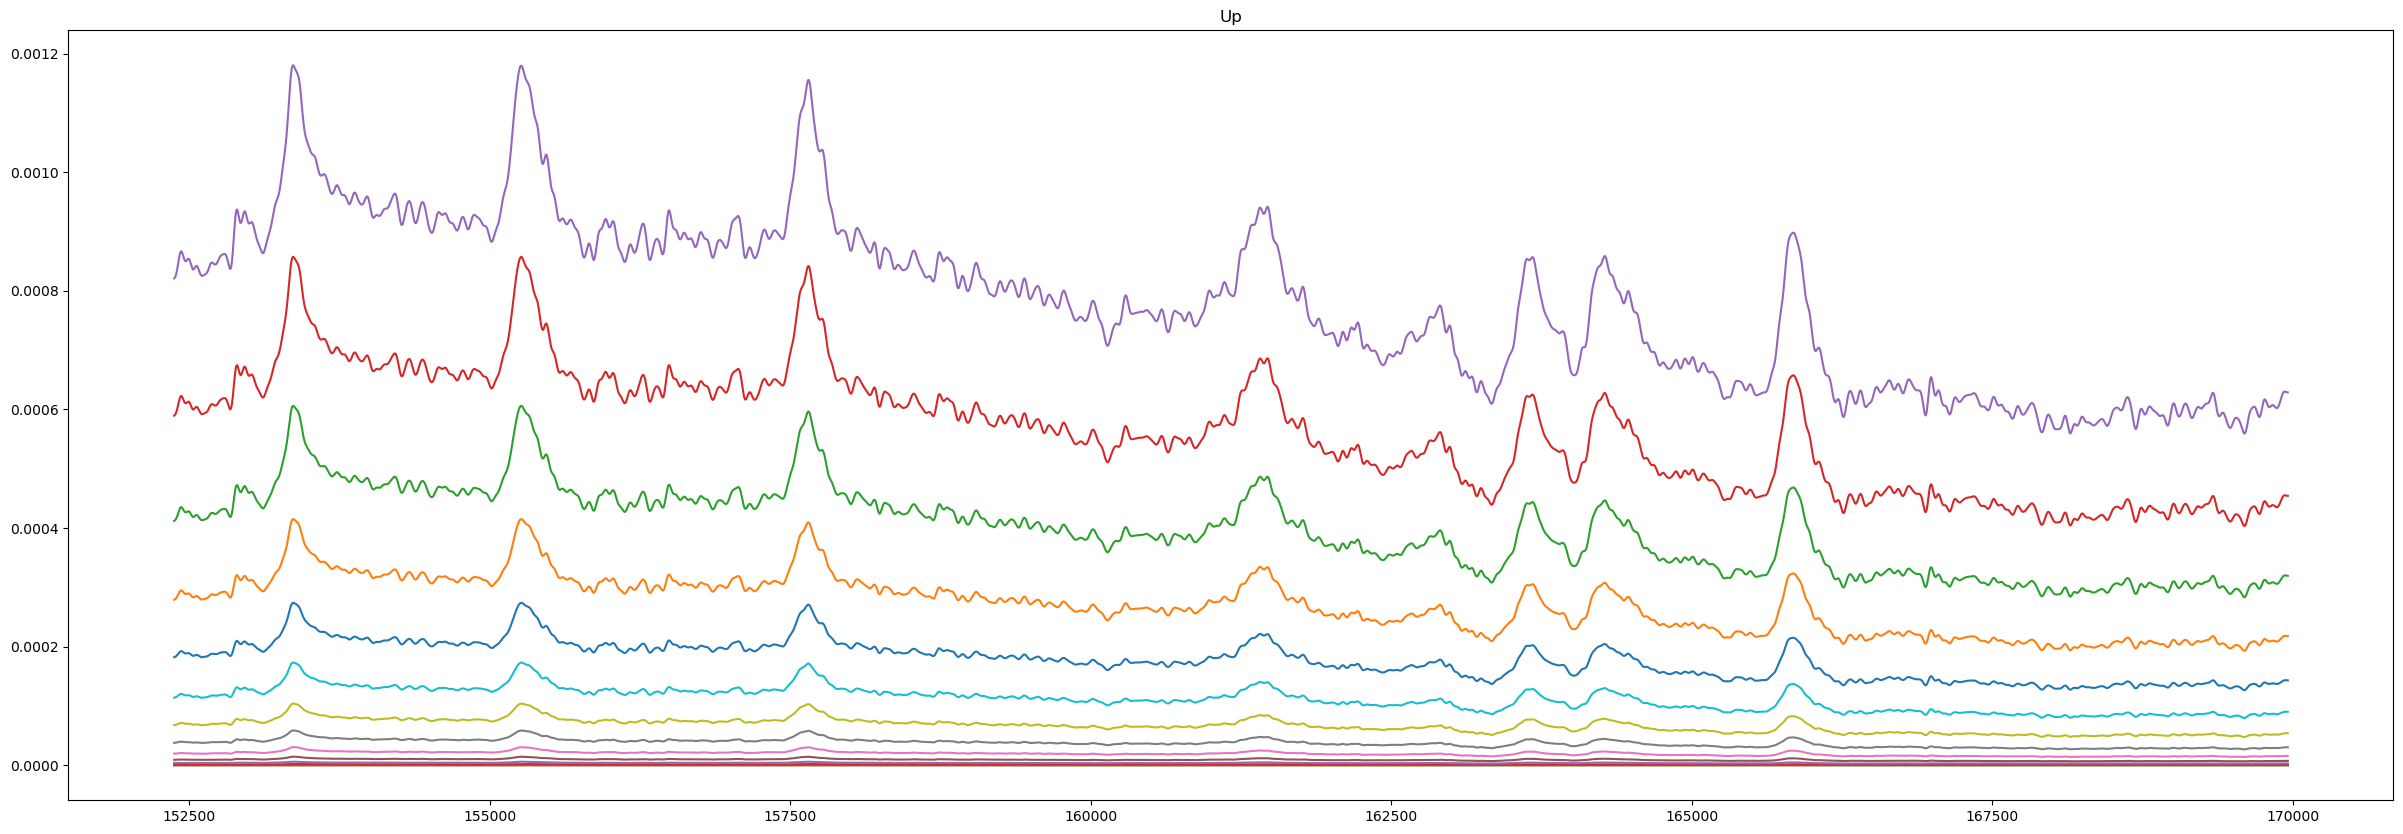

In [25]:
plt.plot(df.loc[ (df['Label']==4) & (df['Trial']==1)].iloc[:,:15])
plt.gcf().set_size_inches(30, 10)
plt.title("Up")

Text(0.5, 1.0, 'Down')

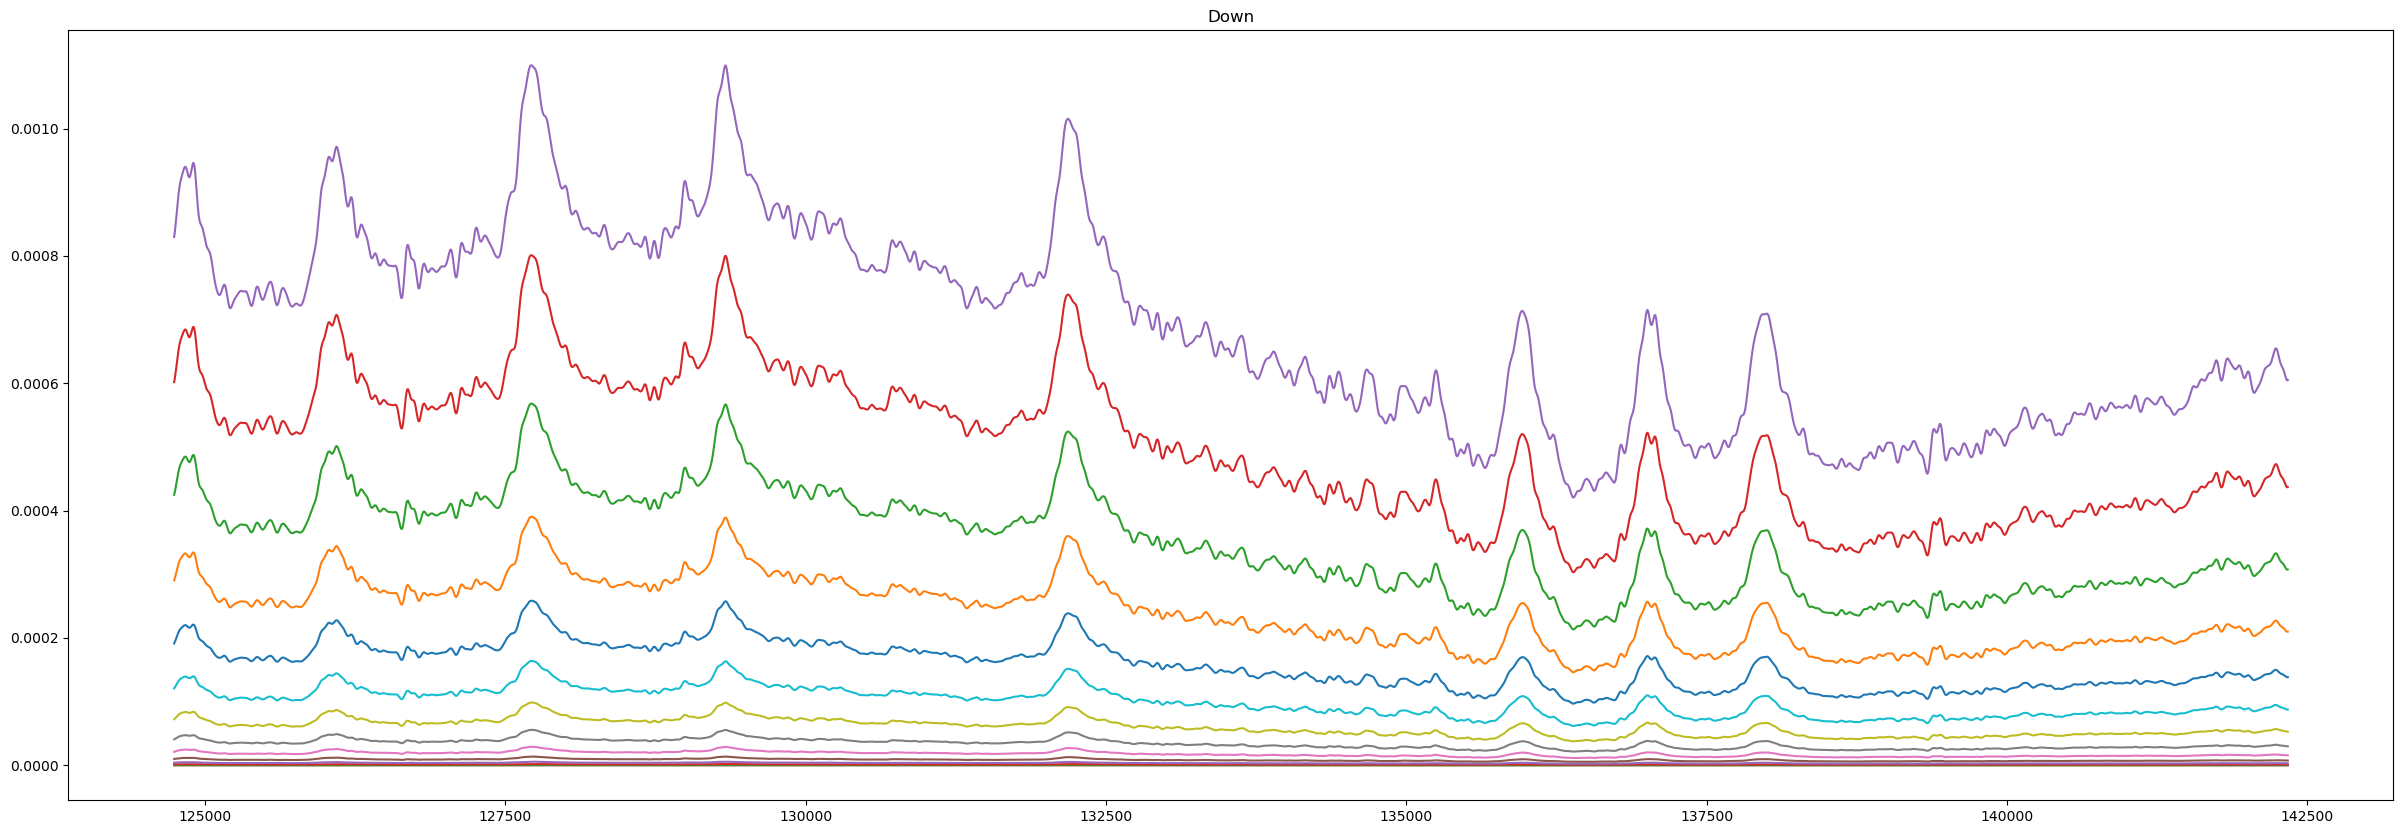

In [26]:
plt.plot(df.loc[ (df['Label']==5) & (df['Trial']==1)].iloc[:,:15])
plt.gcf().set_size_inches(30, 10)
plt.title("Down")

Text(0.5, 1.0, 'break')

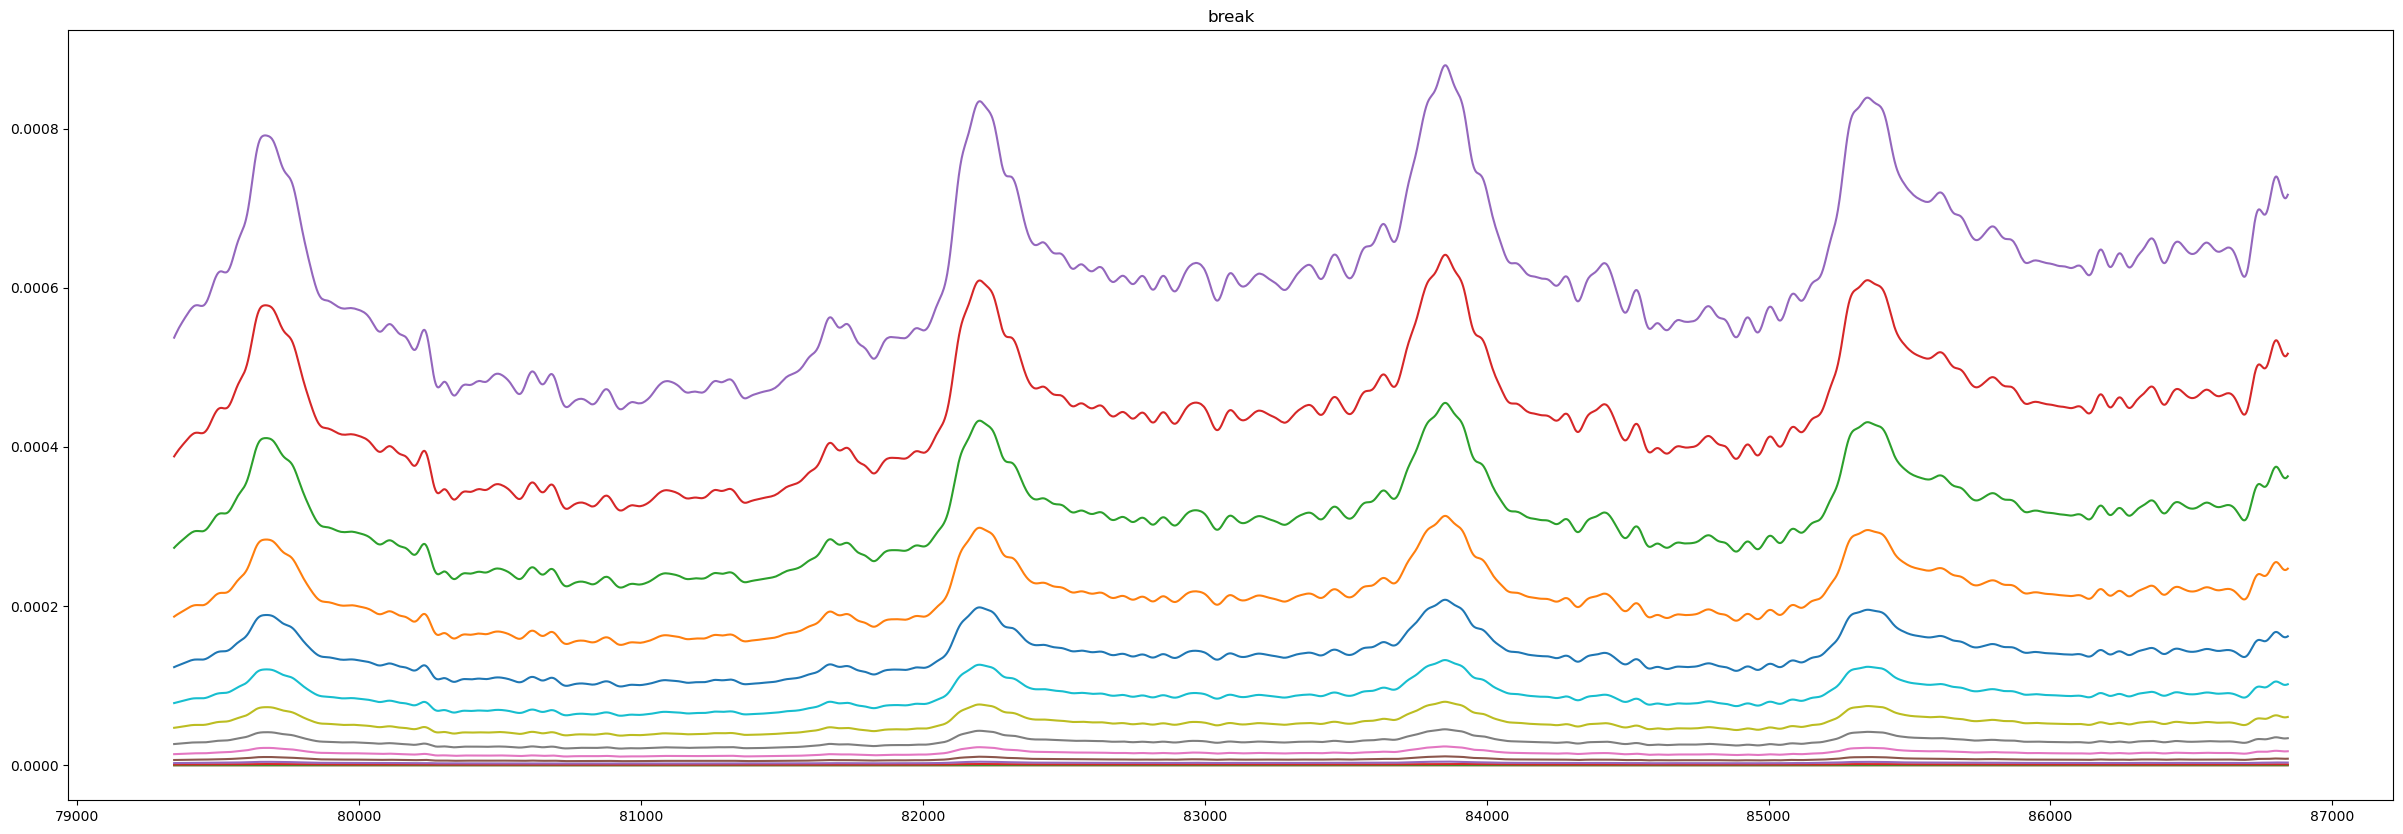

In [27]:
plt.plot(df.iloc[37500:45000,:15])
plt.gcf().set_size_inches(30, 10)
plt.title("break")

### save the data into excel files

In [28]:
# df.to_csv('D:\EEG_ConvertedData\Arm_reaching_Session1_RM_train.csv',index=False)

In [29]:
# Xtrain=glob_train.iloc[:,0:15] 
# Ytrain=glob_train.iloc[:,-2:]
# Xtest=glob_test.iloc[:,0:15] 
# Ytest=glob_test.iloc[:,-2:]